# Examples of Ternary Plots

**Reference**: https://github.com/marcharper/python-ternary/blob/master/examples/Ternary-Examples.ipynb

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib
import ternary

print('Matplotlib version:', matplotlib.__version__)
print("Ternary version:", ternary.__version__)

Matplotlib version: 3.1.3
Ternary version: 1.0.6


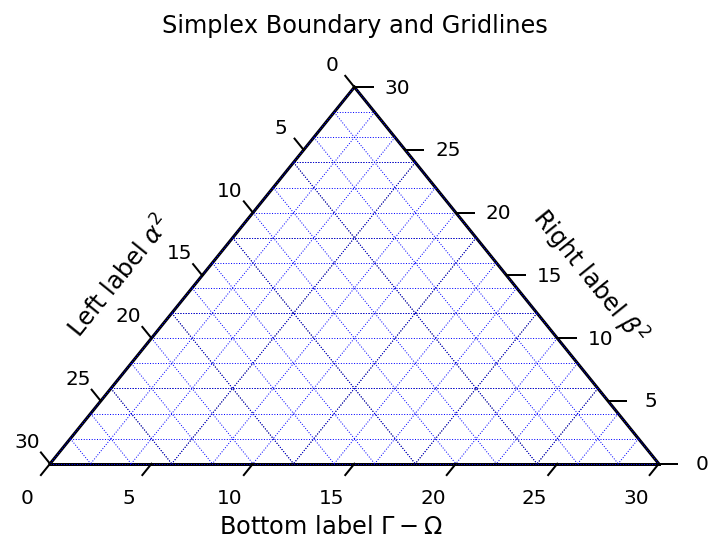

In [5]:
## Boundary and Gridlines
scale = 30
figure, tax = ternary.figure(scale=scale)
# figure.set_size_inches(6, 6)

# Draw Boundary and Gridlines
tax.boundary(linewidth=1.5)
tax.gridlines(color="black", multiple=6)
tax.gridlines(color="blue", multiple=2, linewidth=0.5)

# Set Axis labels and Title
fontsize = 12
tax.set_title("Simplex Boundary and Gridlines\n", fontsize=fontsize)
tax.left_axis_label("Left label $\\alpha^2$", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Right label $\\beta^2$", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("Bottom label $\\Gamma - \\Omega$", fontsize=fontsize, offset=0.14)

# Set ticks
tax.ticks(axis='lbr', linewidth=1, multiple=5, offset=0.03)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

ternary.plt.show()

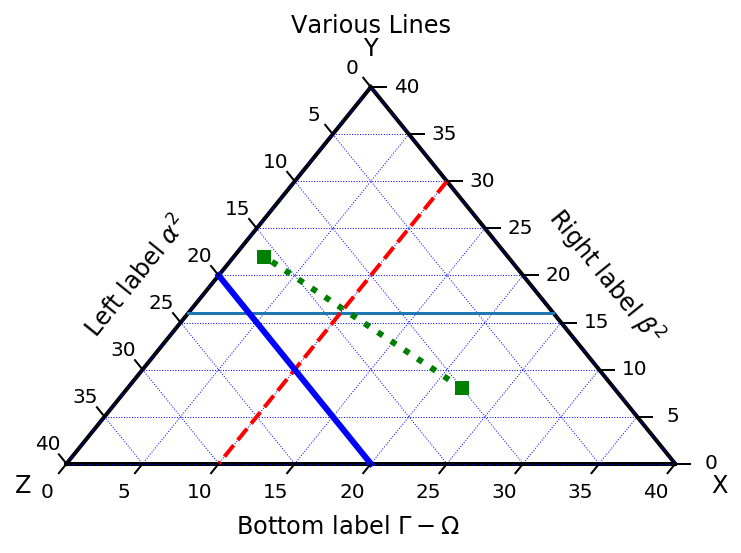

In [6]:
scale = 40
figure, tax = ternary.figure(scale=scale)
# figure.set_size_inches(10, 10)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color="blue", multiple=5)

# Set Axis labels and Title
fontsize = 12
offset = 0.14
tax.set_title("Various Lines\n", fontsize=fontsize)
tax.right_corner_label("X", fontsize=fontsize)
tax.top_corner_label("Y", fontsize=fontsize)
tax.left_corner_label("Z", fontsize=fontsize)
tax.left_axis_label("Left label $\\alpha^2$", fontsize=fontsize, offset=offset)
tax.right_axis_label("Right label $\\beta^2$", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("Bottom label $\\Gamma - \\Omega$", fontsize=fontsize, offset=offset)

# Draw lines parallel to the axes
tax.horizontal_line(16)
tax.left_parallel_line(10, linewidth=2., color='red', linestyle="--")
tax.right_parallel_line(20, linewidth=3., color='blue')
# Draw an arbitrary line, ternary will project the points for you
p1 = (22, 8, 10)
p2 = (2, 22, 16)
tax.line(p1, p2, linewidth=3., marker='s', color='green', linestyle=":")

tax.ticks(axis='lbr', multiple=5, linewidth=1, offset=0.025)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

tax.show()

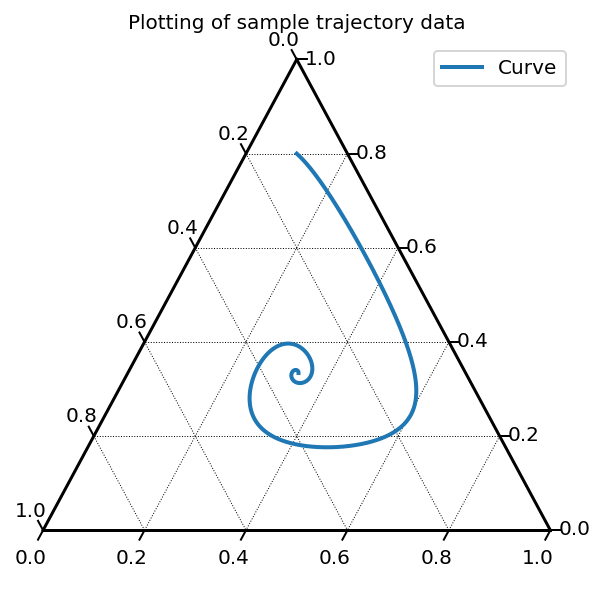

In [8]:
## Sample trajectory plot
figure, tax = ternary.figure(scale=1.0)
figure.set_size_inches(5, 5)

tax.boundary()
tax.gridlines(multiple=0.2, color="black")
tax.set_title("Plotting of sample trajectory data", fontsize=10)
# Load some data, tuples (x,y,z)
points = []
with open("curve.txt") as handle:
    for line in handle:
        points.append(list(map(float, line.split(' '))))

# Plot the data
tax.plot(points, linewidth=2.0, label="Curve")
tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f", offset=0.02)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.legend()
tax.show()

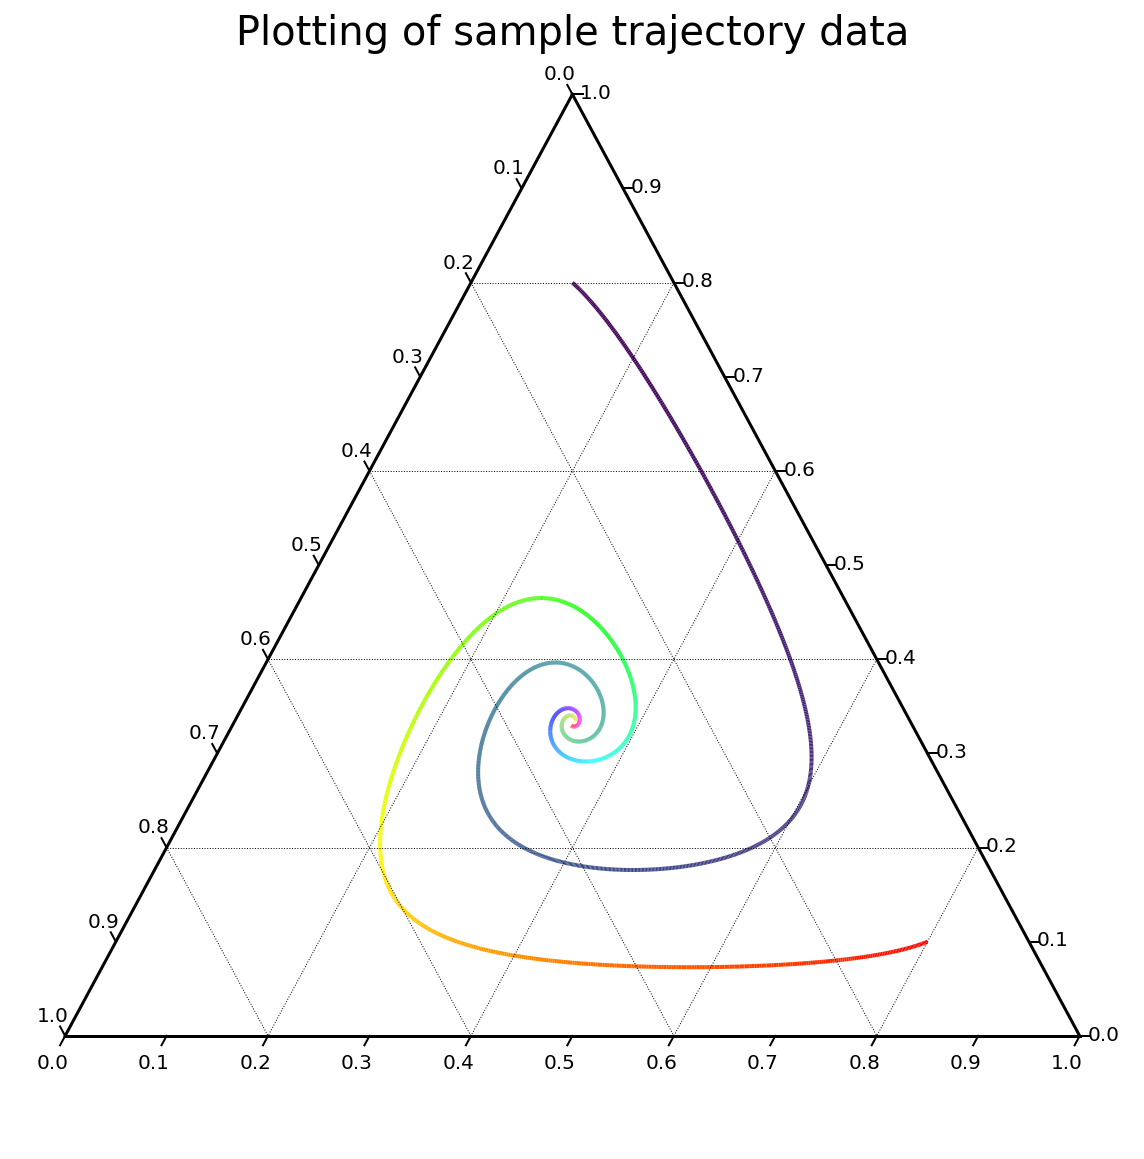

In [9]:
# Using same points as above

fig, tax = ternary.figure(scale=1.0)
fig.set_size_inches(10, 10)

tax.plot_colored_trajectory(points, linewidth=2.0)

## Shuffle points for additional plot
points = [(y, z, x) for (x, y, z) in points]
tax.plot_colored_trajectory(points, cmap="hsv", linewidth=2.0)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats="%.1f")
tax.boundary()
tax.set_title("Plotting of sample trajectory data", fontsize=20)
tax.gridlines(multiple=0.2, color="black")
tax.show()

## Scatter plot

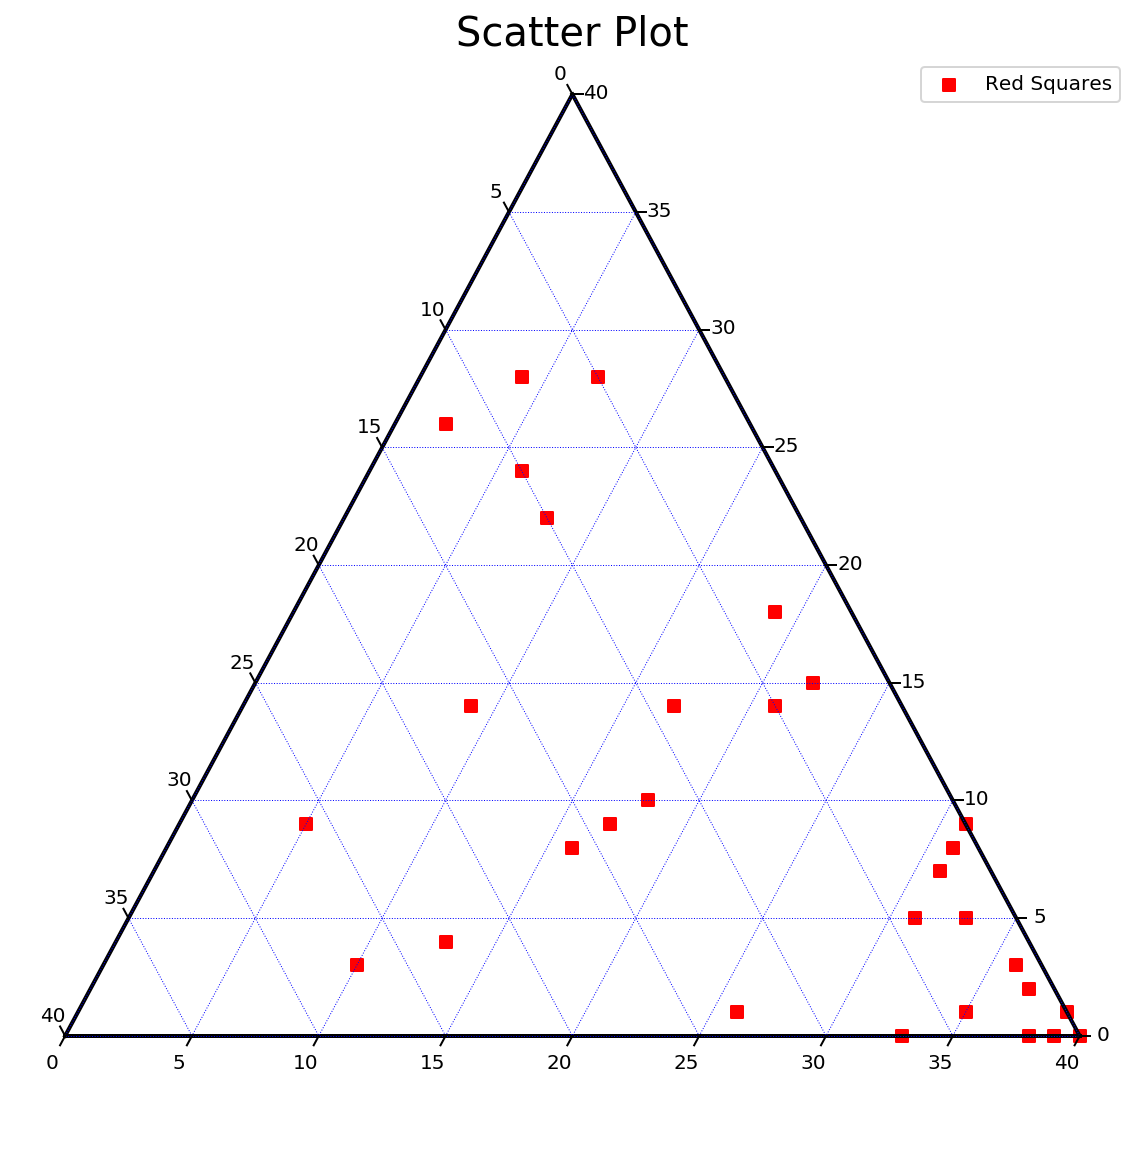

In [3]:
## Generate Data
import random

def random_points(num_points=25, scale=40):
    points = []
    for i in range(num_points):
        x = random.randint(1, scale)
        y = random.randint(0, scale - x)
        z = scale - x - y
        points.append((x,y,z))
    return points

# Scatter Plot
scale = 40
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)
# Plot a few different styles with a legend
points = random_points(30, scale=scale)
tax.scatter(points, marker='s', color='red', label="Red Squares")
#points = random_points(30, scale=scale)
#tax.scatter(points, marker='D', color='green', label="Green Diamonds")
tax.legend()

tax.set_title("Scatter Plot", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=5, color="blue")
tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.show()

## Scatter plot color-coded

In [54]:
## Generate Data
import random
import math

def random_points(num_points=25, scale=40):
    points = []
    colors = []
    for i in range(num_points):
        x = random.randint(1, scale)
        y = random.randint(0, scale - x)
        z = scale - x - y
        points.append((x,y,z))
        colors.append(x)
    return points,colors

def color_point(x, y, z, scale, c):
    w = 255
    x_color = c* x * w / float(scale)
    y_color = c* y * w / float(scale)
    z_color = c* z * w / float(scale)
    r = math.fabs(w - y_color) / w
    g = math.fabs(w - x_color) / w
    b = math.fabs(w - z_color) / w
    return (r, g, b, 1.)

def generate_heatmap_data(points,colors,scale):
    #from ternary.helpers import simplex_iterator
    d = dict()
    for (i, j, k) in points:
        d[(i, j)] = random.random()
    return d

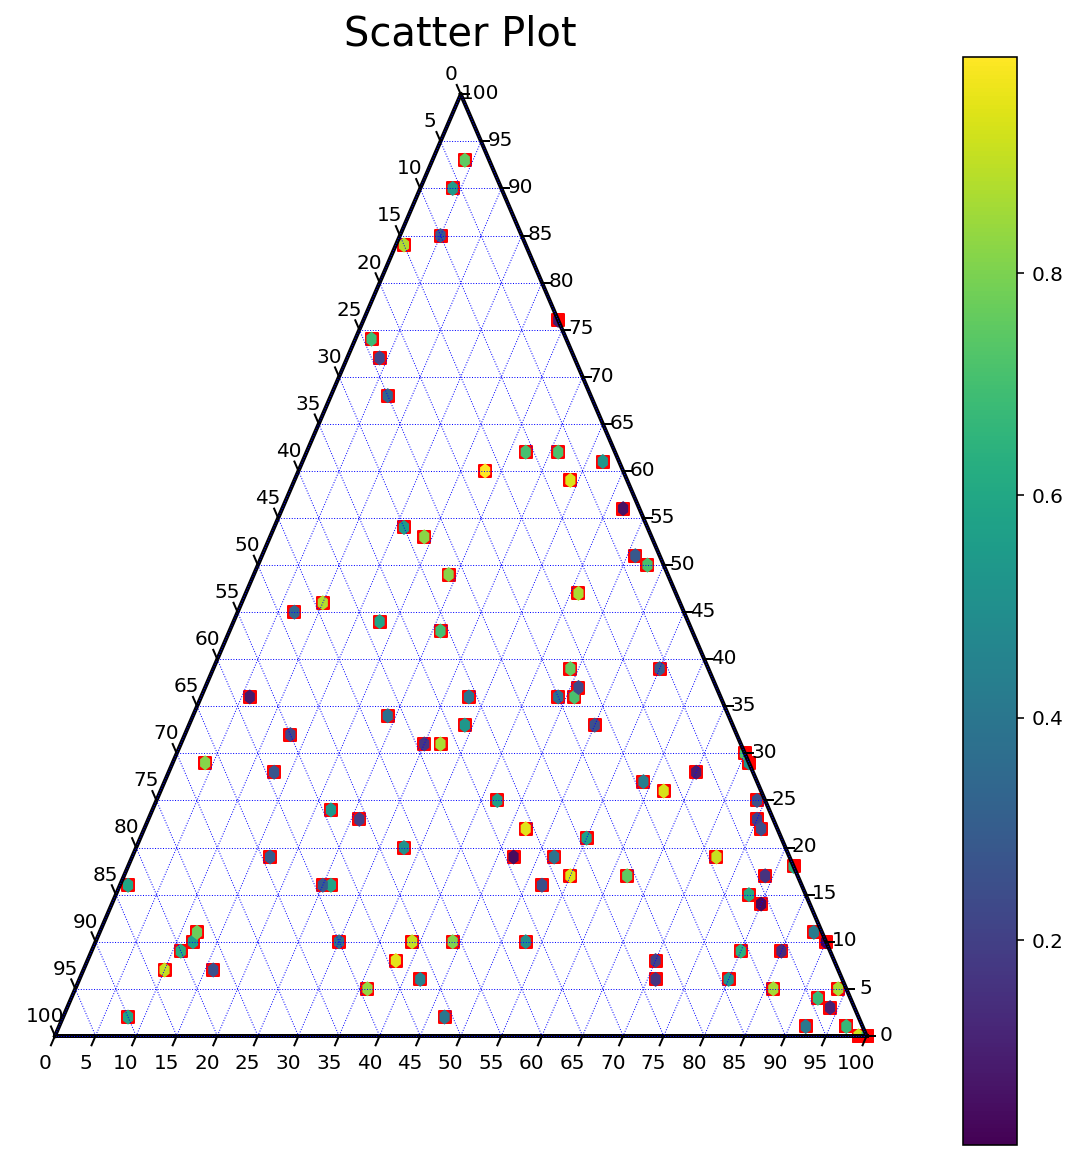

In [56]:
scale = 100

# Data
points,colors = random_points(100, scale=scale)
data = generate_heatmap_data(points,colors,scale)

# Scatter Plot
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

# scatter plot
tax.scatter(points, marker='s', color='red', label="Red Squares")

# heatmap
tax.heatmap(data, style="hexagonal", colorbar=True)

tax.set_title("Scatter Plot", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=5, color="blue")
tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.show()

## Heatmap

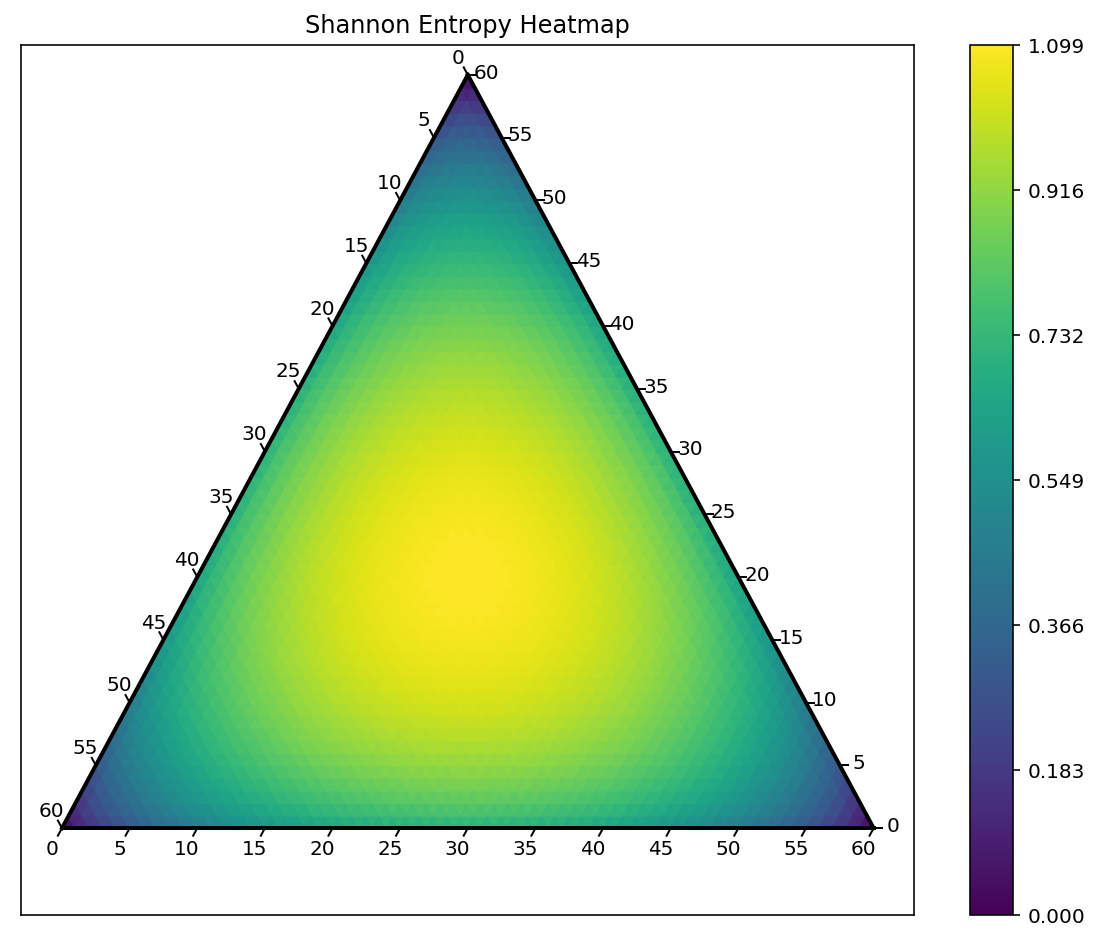

In [2]:
import math

def shannon_entropy(p):
    """Computes the Shannon Entropy at a distribution in the simplex."""
    s = 0.
    for i in range(len(p)):
        try:
            s += p[i] * math.log(p[i])
        except ValueError:
            continue
    return -1. * s

import ternary
scale = 60

figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 8)
tax.heatmapf(shannon_entropy, boundary=True, style="triangular")
tax.boundary(linewidth=2.0)
tax.set_title("Shannon Entropy Heatmap")
tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.show()

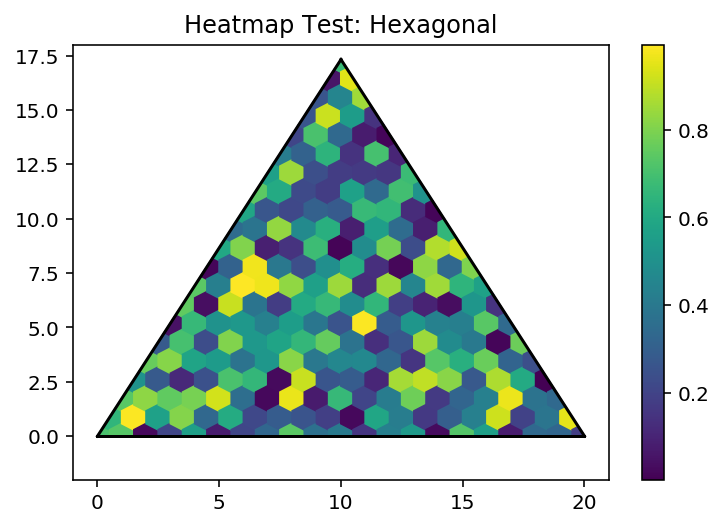

In [46]:
def generate_random_heatmap_data(scale=5):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i,j,k) in simplex_iterator(scale):
        d[(i,j)] = random.random()
    return d

scale = 20
d = generate_random_heatmap_data(scale)
figure, tax = ternary.figure(scale=scale)
tax.heatmap(d, style="h")
tax.boundary()
tax.set_title("Heatmap Test: Hexagonal")

In [47]:
d

{(0, 0): 0.7101083191449734,
 (0, 1): 0.6515986469269028,
 (0, 2): 0.7351872099313287,
 (0, 3): 0.5027383941922645,
 (0, 4): 0.7643254277219342,
 (0, 5): 0.2795090153929275,
 (0, 6): 0.04697958623449505,
 (0, 7): 0.7524383834282821,
 (0, 8): 0.739251624158966,
 (0, 9): 0.014038608426433341,
 (0, 10): 0.5980750818449041,
 (0, 11): 0.343461774763848,
 (0, 12): 0.5834329240297242,
 (0, 13): 0.7455398964838219,
 (0, 14): 0.5619819044946333,
 (0, 15): 0.41364017793787955,
 (0, 16): 0.20658535901010522,
 (0, 17): 0.2629937425443538,
 (0, 18): 0.26269227080531066,
 (0, 19): 0.059148743712878815,
 (0, 20): 0.6759472689737186,
 (1, 0): 0.7306732317868851,
 (1, 1): 0.9885061591491873,
 (1, 2): 0.8267528435347489,
 (1, 3): 0.27674311504113347,
 (1, 4): 0.8124645897617077,
 (1, 5): 0.700977100350602,
 (1, 6): 0.6677924241936575,
 (1, 7): 0.037939079383746965,
 (1, 8): 0.42755823312709684,
 (1, 9): 0.30833288471326015,
 (1, 10): 0.8050952719615196,
 (1, 11): 0.38368057803985367,
 (1, 12): 0.2678618

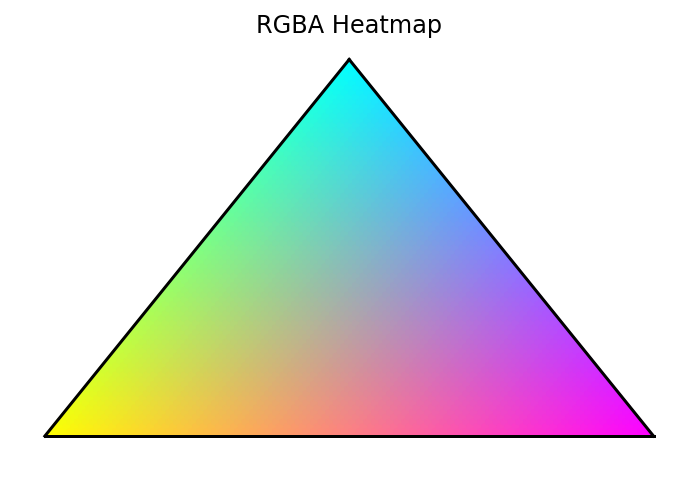

In [6]:
import matplotlib.pyplot as plt

def color_point(x, y, z, scale):
    w = 255
    x_color = x * w / float(scale)
    y_color = y * w / float(scale)
    z_color = z * w / float(scale)
    r = math.fabs(w - y_color) / w
    g = math.fabs(w - x_color) / w
    b = math.fabs(w - z_color) / w
    return (r, g, b, 1.)


def generate_heatmap_data(scale=5):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i, j, k) in simplex_iterator(scale):
        d[(i, j, k)] = color_point(i, j, k, scale)
    return d

scale = 80
data = generate_heatmap_data(scale)

figure, tax = ternary.figure(scale=scale)
tax.heatmap(data, style="hexagonal", use_rgba=True, colorbar=False)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')
tax.boundary()
tax.set_title("RGBA Heatmap")
plt.show()

In [29]:
data

{(0, 0, 80): array([1., 1., 0., 1.]),
 (0, 1, 79): array([0.9875, 1.    , 0.0125, 1.    ]),
 (0, 2, 78): array([0.975, 1.   , 0.025, 1.   ]),
 (0, 3, 77): array([0.9625, 1.    , 0.0375, 1.    ]),
 (0, 4, 76): array([0.95, 1.  , 0.05, 1.  ]),
 (0, 5, 75): array([0.9375, 1.    , 0.0625, 1.    ]),
 (0, 6, 74): array([0.925, 1.   , 0.075, 1.   ]),
 (0, 7, 73): array([0.9125, 1.    , 0.0875, 1.    ]),
 (0, 8, 72): array([0.9, 1. , 0.1, 1. ]),
 (0, 9, 71): array([0.8875, 1.    , 0.1125, 1.    ]),
 (0, 10, 70): array([0.875, 1.   , 0.125, 1.   ]),
 (0, 11, 69): array([0.8625, 1.    , 0.1375, 1.    ]),
 (0, 12, 68): array([0.85, 1.  , 0.15, 1.  ]),
 (0, 13, 67): array([0.8375, 1.    , 0.1625, 1.    ]),
 (0, 14, 66): array([0.825, 1.   , 0.175, 1.   ]),
 (0, 15, 65): array([0.8125, 1.    , 0.1875, 1.    ]),
 (0, 16, 64): array([0.8, 1. , 0.2, 1. ]),
 (0, 17, 63): array([0.7875, 1.    , 0.2125, 1.    ]),
 (0, 18, 62): array([0.775, 1.   , 0.225, 1.   ]),
 (0, 19, 61): array([0.7625, 1.    , 0.23